In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

## Load dataset

In [3]:
# Load the diabetes dataset as pd.DataFrame
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Feature Engineering

In [5]:
# Create a new feature: old man
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


<AxesSubplot:>

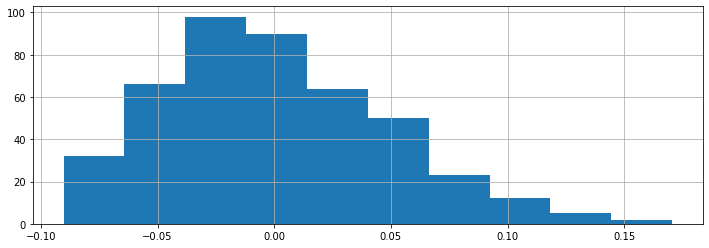

In [6]:
# Example of continuous feature, visualize its distribution
diabetes_X.loc[:, 'bmi'].hist()

[ 0.05068012 -0.04464164]


<AxesSubplot:>

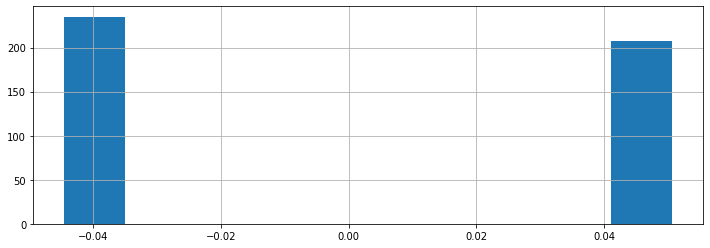

In [7]:
# Example of discrete feature
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()

<AxesSubplot:xlabel='Diabetes risk score', ylabel='Number of patients'>

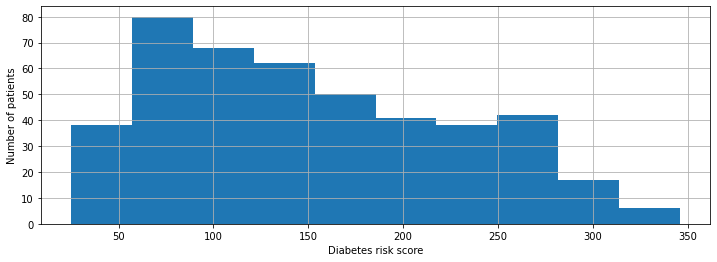

In [8]:
# Distribution of the target (y is continuous => Regression problem)
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

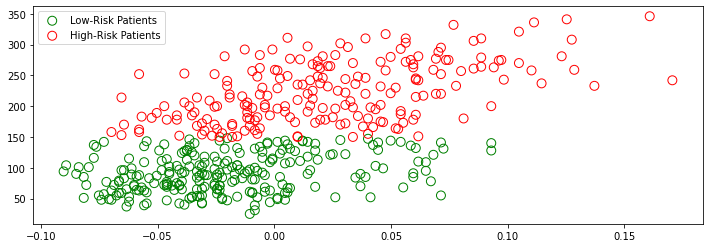

In [9]:
# Discretize the targets (y is discrete => Classification problem)
diabetes_y_discr = np.digitize(diabetes_y, bins=[150])

# Visualize it
plt.scatter(diabetes_X[diabetes_y_discr==0].loc[:,['bmi']], diabetes_y[diabetes_y_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X[diabetes_y_discr==1].loc[:,['bmi']], diabetes_y[diabetes_y_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

In [42]:
# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X.loc[:, ['bmi']] = diabetes_X.loc[:, ['bmi']] * 30 + 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]
diabetes_y_train_discr = diabetes_y_discr[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man,target
422,-0.078165,0.050680,27.335902,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,False,233.0
423,0.009016,0.050680,23.811456,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,False,91.0
424,0.001751,0.050680,25.331171,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,False,111.0
425,-0.078165,-0.044642,23.779122,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,False,152.0
426,0.030811,0.050680,23.973128,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,False,120.0


## Linear Regression Model

In [43]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()   # minimize MSE loss

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 174.03904854195287
Intercept (theta0): 	 172.28736474637424


In [44]:
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

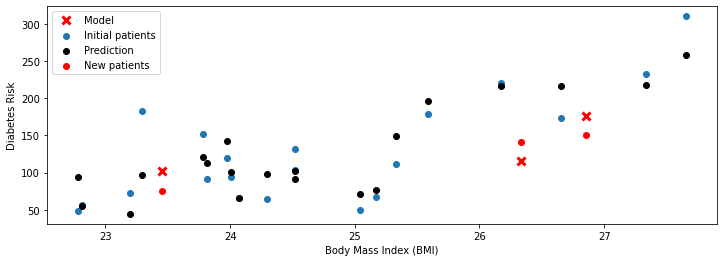

In [45]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black')

plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)

plt.legend(['Model', 'Initial patients','Prediction', 'New patients'])

## Logistic Regression Model

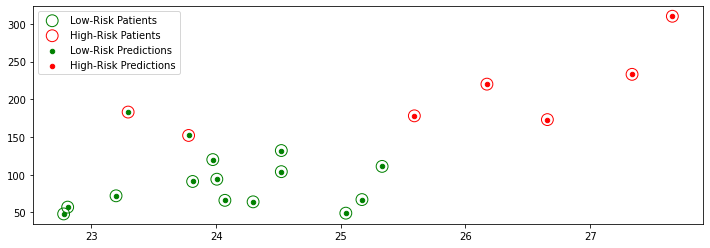

In [46]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train, diabetes_y_train_discr)

# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train)

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0].loc[:, ['bmi']], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1].loc[:, ['bmi']], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0].loc[:, ['bmi']], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1].loc[:, ['bmi']], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])

## Objective (Loss) function and Optimizer

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 20646.45
Test set mean squared error: 667.81
Test set mean squared error on random inputs: 16167.04
